# underestanding dataset

In [32]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [33]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# preprocessing

In [36]:
x = df.drop('HeartDisease', axis=1)
y = df["HeartDisease"]

In [37]:
x.shape

(918, 11)

In [38]:
y.shape

(918,)

In [39]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)

In [40]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =42)

In [42]:
x_train.shape, y_train.shape

((734, 11), (734,))

In [43]:
x_test.shape, y_test.shape

((184, 11), (184,))

In [44]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [45]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [46]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2])

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

# model definition

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer= tf.optimizers.Adam(), loss= tf.losses.binary_crossentropy, metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    restore_best_weights = True
)

In [53]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test),
                 verbose=2,
                 callbacks = [early_stop]
)

Epoch 1/200
6/6 - 11s - 2s/step - accuracy: 0.5586 - loss: 0.6800 - val_accuracy: 0.8261 - val_loss: 0.6415
Epoch 2/200
6/6 - 1s - 88ms/step - accuracy: 0.6431 - loss: 0.6318 - val_accuracy: 0.8261 - val_loss: 0.5660
Epoch 3/200
6/6 - 0s - 22ms/step - accuracy: 0.7384 - loss: 0.5672 - val_accuracy: 0.7500 - val_loss: 0.4958
Epoch 4/200
6/6 - 0s - 15ms/step - accuracy: 0.8188 - loss: 0.4822 - val_accuracy: 0.7391 - val_loss: 0.4599
Epoch 5/200
6/6 - 0s - 23ms/step - accuracy: 0.8270 - loss: 0.4170 - val_accuracy: 0.7554 - val_loss: 0.4589
Epoch 6/200
6/6 - 0s - 23ms/step - accuracy: 0.8243 - loss: 0.4390 - val_accuracy: 0.7717 - val_loss: 0.4364
Epoch 7/200
6/6 - 0s - 24ms/step - accuracy: 0.8202 - loss: 0.4039 - val_accuracy: 0.7717 - val_loss: 0.4209
Epoch 8/200
6/6 - 0s - 22ms/step - accuracy: 0.8501 - loss: 0.3934 - val_accuracy: 0.8261 - val_loss: 0.3892
Epoch 9/200
6/6 - 0s - 15ms/step - accuracy: 0.8256 - loss: 0.3978 - val_accuracy: 0.8261 - val_loss: 0.3966
Epoch 10/200
6/6 - 0

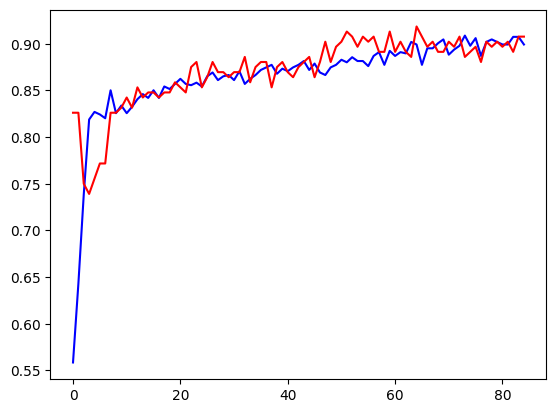

In [54]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')

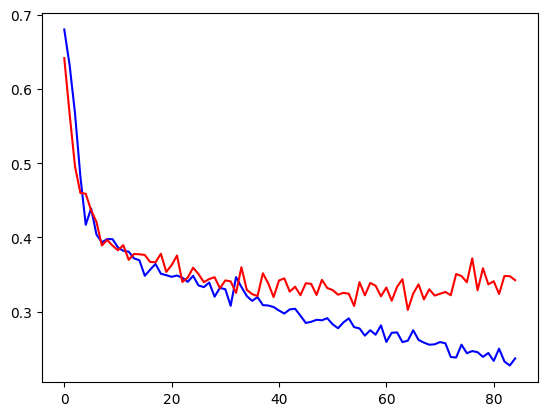

In [55]:
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')